In [1]:
# what is this line all about? Answer in lecture 4
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
from scipy import *

In [3]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [4]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print "J_%d(%f) = %f" % (n, x, jn(n, x))

x = 1.0
# Bessel function of second kind
print "Y_%d(%f) = %f" % (n, x, yn(n, x))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


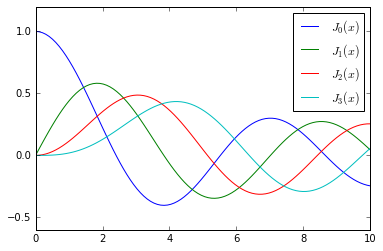

In [5]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [6]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

In [7]:
from scipy.integrate import quad, dblquad, tplquad


In [8]:
# define a simple function for the integrand
def f(x):
    return x

In [9]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print "integral value =", val, ", absolute error =", abserr 

integral value = 0.5 , absolute error = 5.55111512313e-15


In [10]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print val, abserr 

0.736675137081 9.3891268825e-13


In [11]:
val, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print "numerical  =", val, abserr

analytical = sqrt(pi)
print "analytical =", analytical

numerical  = 1.77245385091 1.42026367809e-08
analytical = 1.77245385091


In [12]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print val, abserr 

0.785398163397 1.63822994214e-13


In [13]:
from scipy.integrate import odeint, ode


In [14]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

In [15]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [16]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

In [17]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = linspace(0, 10, 250)

In [18]:
# solve the ODE problem
x = odeint(dx, x0, t)

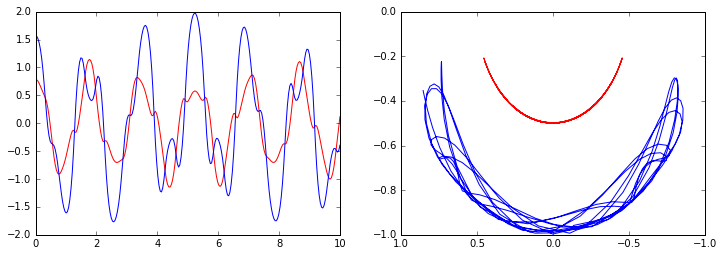

In [19]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

In [20]:
from IPython.display import display, clear_output
import time

In [22]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [23]:
# initial state: 
y0 = [1.0, 0.0]

In [24]:
# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [25]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

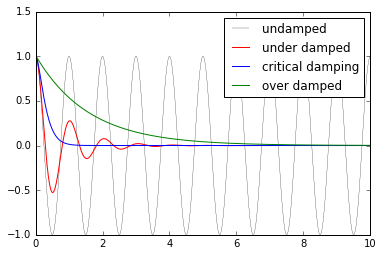

In [26]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

In [27]:
from numpy.fft import fftfreq
from scipy.fftpack import *

In [28]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

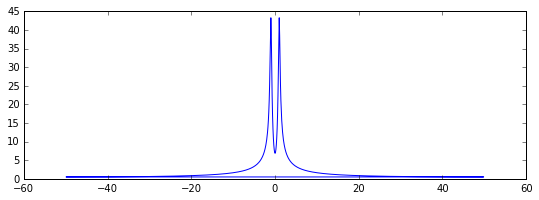

In [29]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

In [30]:
indices = where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

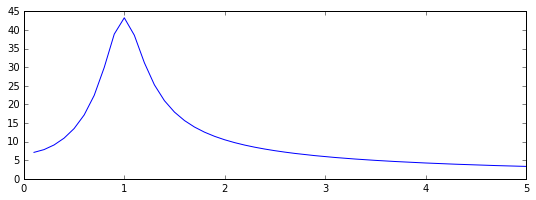

In [31]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);